Пусть задан набор из трех пар точек (p = 3): {(0,9; 1), (2,1; 1,9), (3,1; 3)}
Требуется аппроксимировать эту зависимость функцией

y(x) = w1h1(x) + w2h2(x)

где ℎ1(𝑥) и ℎ2(𝑥) – выходы радиально-базисных нейронов, заданных в
виде:

h1(x) = exp(-(x-1,5)^2), h2(x) = exp(-(x-2,5)^2)

Центры функции активации с1 = (0,9 + 2,1)/2 = 1,5, соответственно с2 = 2,5

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.DataFrame({'x': [0.9, 2.1, 3.1], 'y': [1.0, 1.9, 3.0]})

In [5]:
data

,x,y
0,0.9,1.0
1,2.1,1.9
2,3.1,3.0


In [57]:
class RBF:

    def __init__(self):
        self.centers = None
        self.W = None

    # вычисляем центры функции активации
    def calc_c_activation(self, x):
        c = {}
        for i in range(1, len(x)):
            c[f'h{i}'] = (x[i] + x[i - 1]) / 2

        self.centers = c
        return c

    def calc_matrix_n_activations(self, x):
        F = pd.DataFrame() # матрица активаций нейронов

        for key, center in self.centers.items():
            F[key] = np.exp(-(x - center) ** 2)  # формула влияния точек на нейроны
            
        return F

    # вычисляем веса
    def calc_coef_w(self, x, y):
        F = self.calc_matrix_n_activations(x)

        FtF = np.dot(np.transpose(F), F) # так как HW = Y -> F^T*FW = F^T*Y
        invFtF = np.linalg.inv(FtF) # ицем (F^T*F)^(-1)
        self.W = np.dot(np.dot(invFtF, np.transpose(F)), y) # ищем W = ((F^T*F)^(-1)) * F^T * Y
        
        return self.W

    # вычисляем аппроксимирующую функцию
    def func(self, x):
        F = self.calc_matrix_n_activations(x)
        y_pred = np.dot(F, self.W)
        return y_pred

    # отображаем графики
    def show_graphics(self, x, y):
        x_dense = np.linspace(x.min(), x.max(), 200)
        print(f'Истинные значения y: {np.array(y)}')
        print(f'Вычисленные значения y: {self.func(x)}')

        plt.plot(x_dense, self.func(x_dense), color='green')
        plt.plot(x, y, marker='o', color='purple')
        plt.title('Исходный график и его наилучшая аппроксимация')
        plt.show()


In [58]:
rbf = RBF()

In [59]:
rbf.calc_c_activation(data['x'])

{'h1': np.float64(1.5), 'h2': np.float64(2.6)}

In [60]:
rbf.calc_coef_w(data['x'], data['y'])

array([0.32843573, 3.01010221])

In [61]:
rbf.func(data['x'])

array([0.39643192, 2.57341179, 2.36965959])

Истинные значения y: [1.  1.9 3. ]
Вычисленные значения y: [0.39643192 2.57341179 2.36965959]


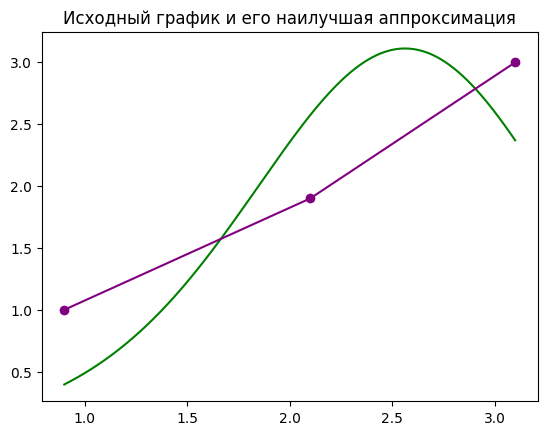

In [62]:
rbf.show_graphics(data['x'], data['y'])